### **Praktikum 1. Segmentasi Menggunakan Thresholding Global dan Otsu**

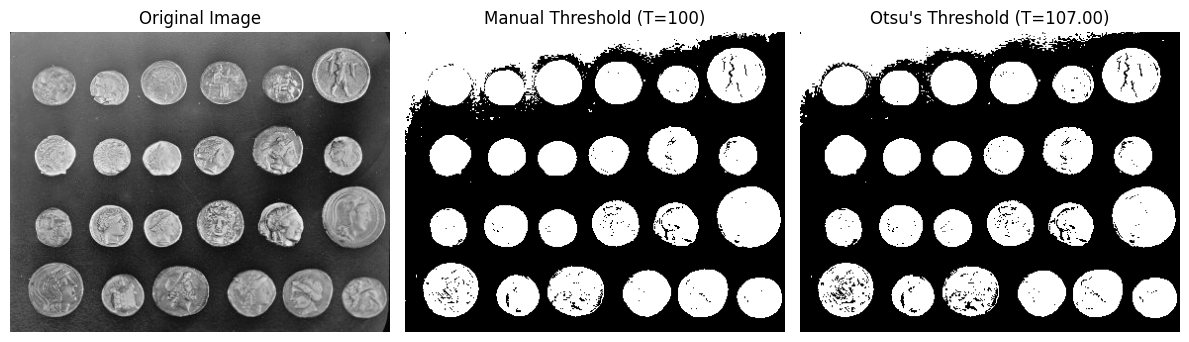

Nilai threshold Otsu yang ditemukan: 107


In [11]:
import matplotlib.pyplot as plt
from skimage import data, filters, img_as_ubyte
from skimage.color import rgb2gray

image_coins = data.coins()
thresh_manual = 100
binary_manual = image_coins > thresh_manual

thresh_otsu = filters.threshold_otsu(image_coins)
binary_otsu = image_coins > thresh_otsu

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_manual, cmap=plt.cm.gray)
ax[1].set_title(f'Manual Threshold (T={thresh_manual})')
ax[1].axis('off')

ax[2].imshow(binary_otsu, cmap=plt.cm.gray)
ax[2].set_title(f'Otsu\'s Threshold (T={thresh_otsu:.2f})')
ax[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Nilai threshold Otsu yang ditemukan: {thresh_otsu}")




### **Praktikum 2. Segmentasi Menggunakan Region Growing (Contoh Sederhana)**

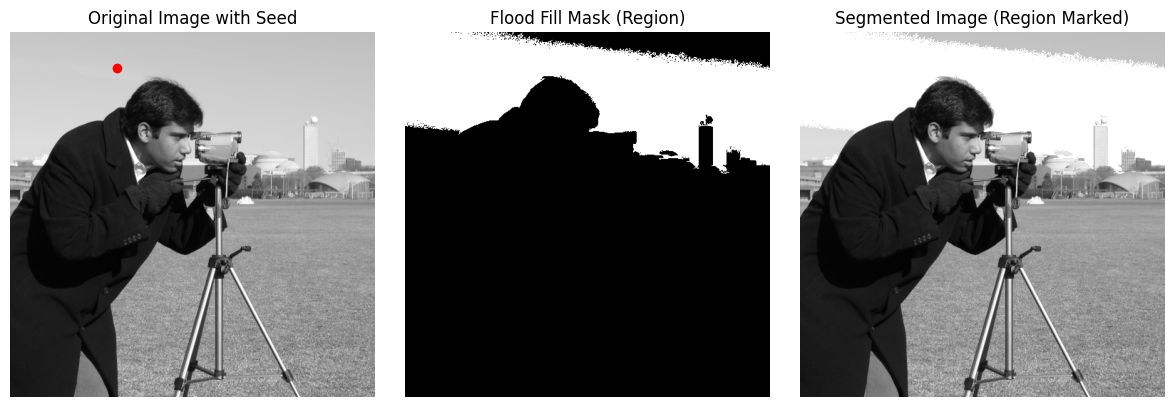

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, color

image_camera = data.camera()
seed_point = (50, 150)
flood_mask = segmentation.flood(image_camera, seed_point, tolerance=10)

segmented_image = np.copy(image_camera)
segmented_image[flood_mask] = 255

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_camera, cmap=plt.cm.gray)
ax[0].plot(seed_point[1], seed_point[0], 'ro')
ax[0].set_title('Original Image with Seed')
ax[0].axis('off')

ax[1].imshow(flood_mask, cmap=plt.cm.gray)
ax[1].set_title('Flood Fill Mask (Region)')
ax[1].axis('off')

ax[2].imshow(segmented_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image (Region Marked)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


### **Praktikum 3. Segmentasi Citra Berwarna Menggunakan K-Means Clustering**

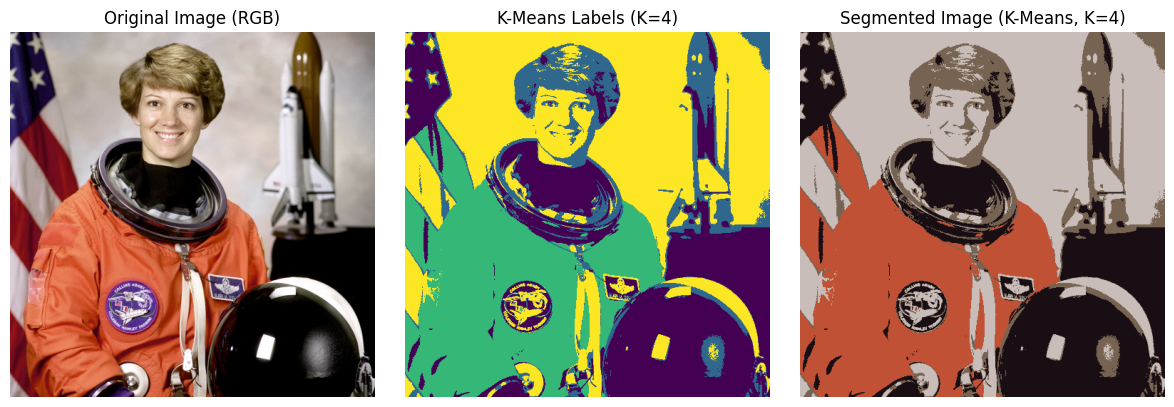

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, lab2rgb
import warnings

image_astro = data.astronaut()
image_astro_float = image_astro.astype(float) / 255.0

image_lab = rgb2lab(image_astro_float)
rows, cols, dims = image_lab.shape
pixel_features = image_lab.reshape(rows * cols, dims)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pixel_labels = kmeans.fit_predict(pixel_features)

segmented_labels = pixel_labels.reshape(rows, cols)

segmented_image_kmeans = np.zeros_like(image_lab)
centers_lab = kmeans.cluster_centers_
for k in range(n_clusters):
    cluster_pixels = (pixel_labels == k)
    mask_k = cluster_pixels.reshape(rows, cols)
    segmented_image_kmeans[mask_k] = centers_lab[k]

segmented_image_rgb = lab2rgb(segmented_image_kmeans)

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_astro)
ax[0].set_title('Original Image (RGB)')
ax[0].axis('off')

ax[1].imshow(segmented_labels, cmap='viridis')
ax[1].set_title(f'K-Means Labels (K={n_clusters})')
ax[1].axis('off')

ax[2].imshow(segmented_image_rgb)
ax[2].set_title(f'Segmented Image (K-Means, K={n_clusters})')
ax[2].axis('off')

plt.tight_layout()
plt.show()


### **Praktikum 4. Segmentasi Berbasis Tepi Menggunakan Watershed**

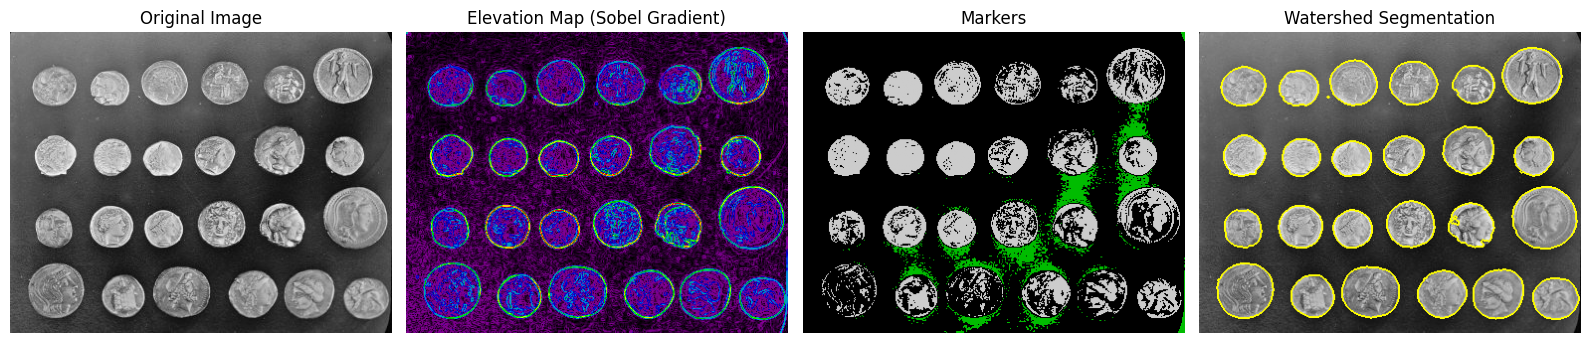

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation, morphology, measure
from scipy import ndimage as ndi

image_coins = data.coins()
elevation_map = filters.sobel(image_coins)

markers = np.zeros_like(image_coins)
markers[image_coins < 30] = 1
markers[image_coins > 150] = 2

segmentation_watershed = segmentation.watershed(elevation_map, markers)
segmented_colored = segmentation.mark_boundaries(image_coins, segmentation_watershed)

fig, axes = plt.subplots(ncols=4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(elevation_map, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Elevation Map (Sobel Gradient)')
ax[1].axis('off')

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Markers')
ax[2].axis('off')

ax[3].imshow(segmented_colored)
ax[3].set_title('Watershed Segmentation')
ax[3].axis('off')

plt.tight_layout()
plt.show()


### **Praktikum 5. Perbandingan Visual Hasil Segmentasi**

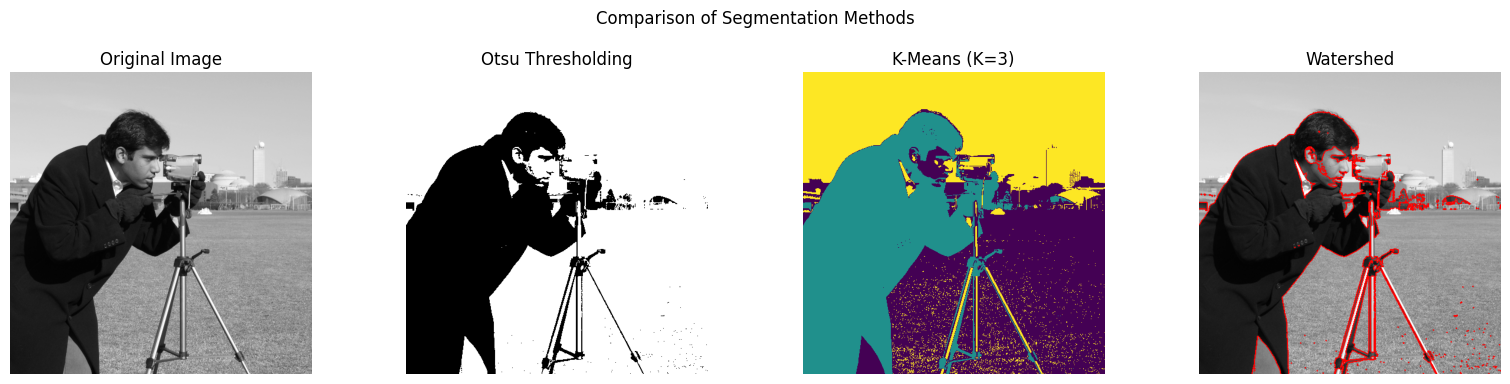

In [15]:
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation, img_as_float
from sklearn.cluster import KMeans
import numpy as np
import warnings

image = data.camera()
image_float = img_as_float(image)

# Otsu Thresholding
thresh_otsu = filters.threshold_otsu(image)
binary_otsu = image > thresh_otsu

# K-Means
rows, cols = image.shape
pixel_features = image_float.reshape(rows * cols, 1)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pixel_labels = kmeans.fit_predict(pixel_features)
segmented_kmeans_labels = pixel_labels.reshape(rows, cols)

# Watershed
elevation_map = filters.sobel(image)
markers = np.zeros_like(image)
markers[image < thresh_otsu] = 1
markers[image > thresh_otsu] = 2
segmentation_watershed = segmentation.watershed(elevation_map, markers)
segmented_watershed_colored = segmentation.mark_boundaries(image_float, segmentation_watershed, color=(1, 0, 0))

# Visualisasi
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1].set_title('Otsu Thresholding')
ax[1].axis('off')

ax[2].imshow(segmented_kmeans_labels, cmap='viridis')
ax[2].set_title(f'K-Means (K={n_clusters})')
ax[2].axis('off')

ax[3].imshow(segmented_watershed_colored)
ax[3].set_title('Watershed')
ax[3].axis('off')

plt.suptitle('Comparison of Segmentation Methods')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### **Penugasan**

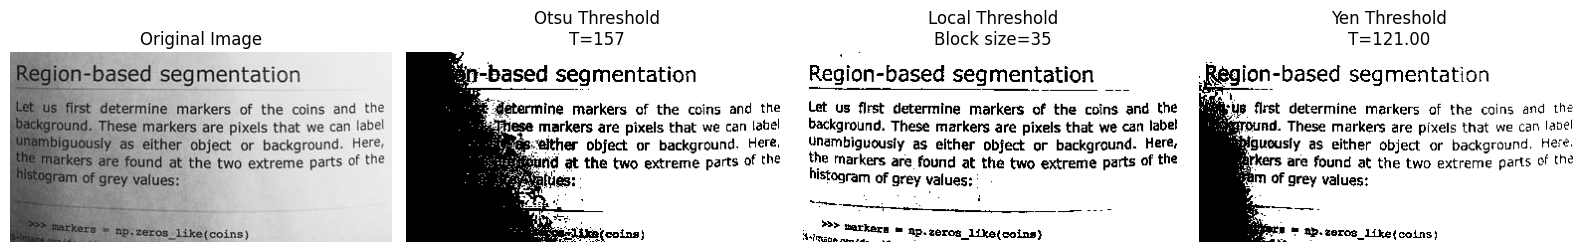

In [16]:
import matplotlib.pyplot as plt
from skimage import data, filters
from skimage.filters import threshold_local, threshold_yen

# 1. Memuat citra dokumen
image = data.page()

# 2. Otsu Thresholding
thresh_otsu = filters.threshold_otsu(image)
binary_otsu = image > thresh_otsu

# 3. Local Thresholding
block_size = 35
local_thresh = threshold_local(image, block_size, offset=10)
binary_local = image > local_thresh

# 4. Yen Thresholding
thresh_yen = threshold_yen(image)
binary_yen = image > thresh_yen

# 5. Visualisasi hasil
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_otsu, cmap='gray')
ax[1].set_title(f'Otsu Threshold\nT={thresh_otsu}')
ax[1].axis('off')

ax[2].imshow(binary_local, cmap='gray')
ax[2].set_title(f'Local Threshold\nBlock size={block_size}')
ax[2].axis('off')

ax[3].imshow(binary_yen, cmap='gray')
ax[3].set_title(f'Yen Threshold\nT={thresh_yen:.2f}')
ax[3].axis('off')

plt.tight_layout()
plt.show()


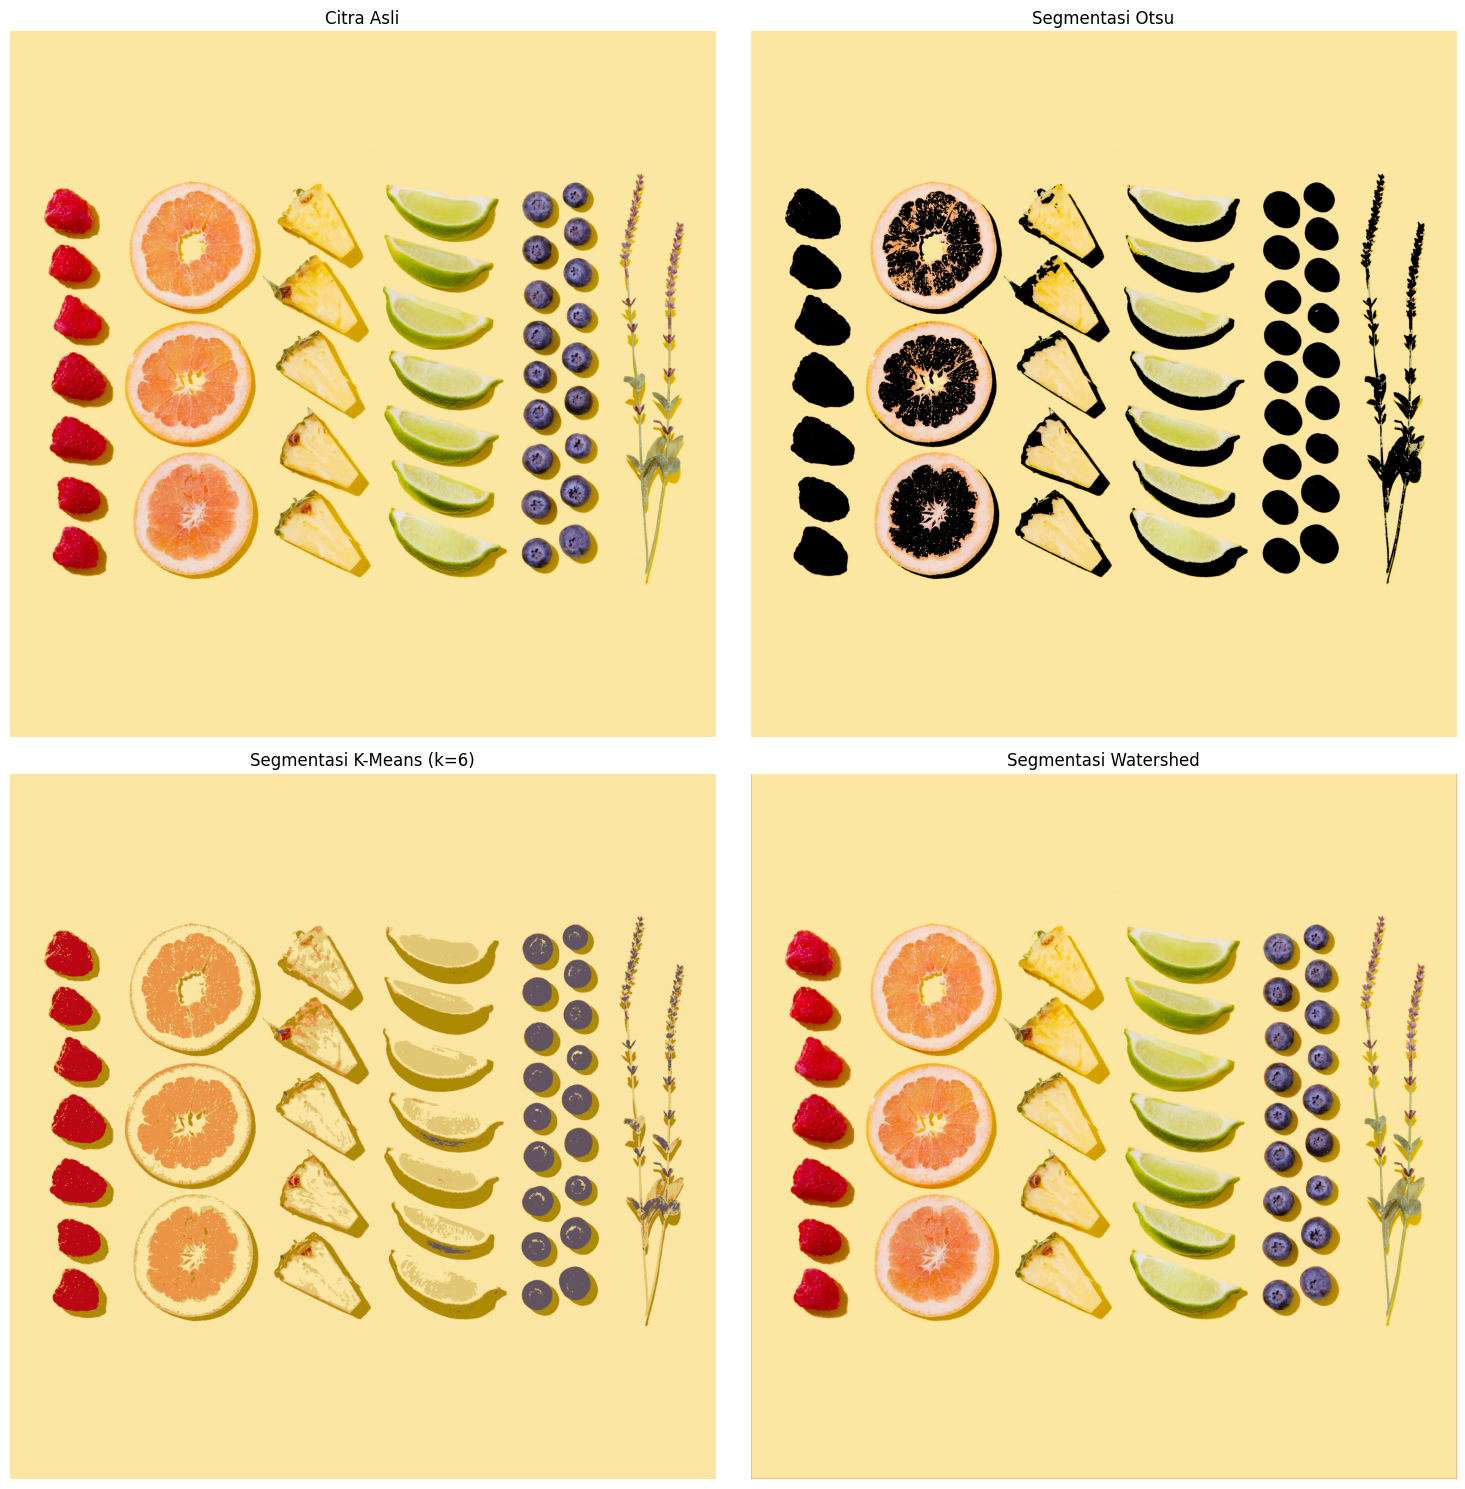

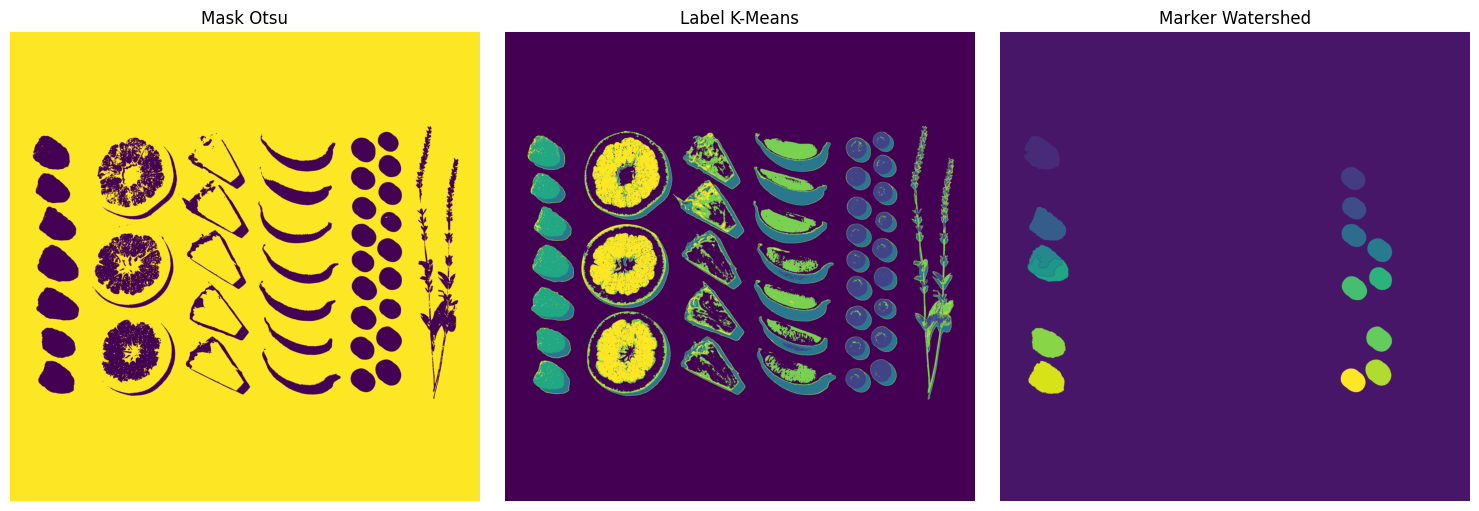

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import color, filters, morphology, segmentation

# Memuat citra
image = cv2.imread('gambarbuah.jpg')
# Konversi BGR ke RGB (matplotlib menggunakan RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Fungsi untuk menampilkan hasil
def display_results(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img)
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.tight_layout()
    return fig

# 1. Metode Otsu Thresholding
def otsu_segmentation(image):
    # Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Terapkan Gaussian blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Terapkan metode Otsu untuk menemukan nilai threshold optimal
    _, otsu_result = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Buat hasil berwarna dengan menerapkan mask
    colored_result = image.copy()
    colored_result[otsu_result == 0] = [0, 0, 0]  # Objek hitam, background tetap
    
    return otsu_result, colored_result

# 2. Metode K-Means Clustering
def kmeans_segmentation(image, k=5):
    # Reshape image untuk clustering
    pixels = image.reshape(-1, 3)
    
    # Terapkan K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(pixels)
    
    # Dapatkan pusat cluster
    centers = kmeans.cluster_centers_
    
    # Rekonstruksi gambar tersegmentasi
    segmented_image = centers[labels].reshape(image.shape).astype(np.uint8)
    
    # Buat citra yang menunjukkan label cluster
    labeled_image = labels.reshape(image.shape[0], image.shape[1])
    
    return labeled_image, segmented_image

# 3. Metode Watershed
def watershed_segmentation(image):
    # Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Terapkan threshold
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Noise removal dengan morphological opening
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Tentukan background dan foreground
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Hitung distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    sure_fg = sure_fg.astype(np.uint8)
    
    # Temukan region yang tidak diketahui (unknown)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)
    # Tambahkan 1 ke semua label sehingga background bukan 0
    markers = markers + 1
    # Tandai unknown region sebagai 0
    markers[unknown == 255] = 0
    
    # Terapkan watershed
    markers = cv2.watershed(image, markers)
    
    # Buat citra hasil watershed
    watershed_result = image.copy()
    watershed_result[markers == -1] = [255, 0, 0]  # Batas berwarna merah
    
    # Buat citra yang menunjukkan marker/label
    marker_image = np.zeros_like(gray)
    for i in range(1, markers.max() + 1):
        marker_image[markers == i] = i * (255 // (markers.max() + 1))
    
    return marker_image, watershed_result

# Jalankan semua metode segmentasi
otsu_mask, otsu_colored = otsu_segmentation(image)
kmeans_labels, kmeans_result = kmeans_segmentation(image, k=6)
watershed_markers, watershed_result = watershed_segmentation(image)

# Tampilkan hasil
original_and_results = [image, otsu_colored, kmeans_result, watershed_result]
titles = ['Citra Asli', 'Segmentasi Otsu', 'Segmentasi K-Means (k=6)', 'Segmentasi Watershed']

plt.figure(figsize=(15, 15))
for i, (img, title) in enumerate(zip(original_and_results, titles)):
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Tampilkan mask/label untuk analisis lebih lanjut
mask_results = [otsu_mask, kmeans_labels, watershed_markers]
mask_titles = ['Mask Otsu', 'Label K-Means', 'Marker Watershed']

plt.figure(figsize=(15, 5))
for i, (img, title) in enumerate(zip(mask_results, mask_titles)):
    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='viridis')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()